In [2]:
import os
from pathlib import Path
import torch
from torchvision.transforms import ToTensor
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt

train_image_dir = Path('./datasets/training/images')
train_label_dir = Path('./datasets/training/1st_manual')
train_mask_dir = Path('./datasets/training/mask')
assert os.path.exists(train_image_dir), "{} path does not exist".format(train_image_dir)
assert os.path.exists(train_label_dir), "{} path does not exist".format(train_label_dir)
assert os.path.exists(train_mask_dir), "{} path does not exist".format(train_mask_dir)

file_path='./datasets/training/images/21_training.tif'
img = Image.open(file_path)
img = ToTensor()(img)
print(type(img))

<class 'torch.Tensor'>


In [4]:
def preprocess(pil_img, scale, is_mask):
    w, h = pil_img.size
    new_w, new_h = int(scale * w), int(scale * h)
    assert new_w > 0 and new_h > 0, f'Scale is too small, resize images would have no pixel'
    pil_img = pil_img.resize((new_w, new_h), resample=Image.NEAREST if is_mask else Image.BICUBIC)
    img_ndarray = np.asarray(pil_img)
    if not is_mask:
        if img_ndarray.ndim == 2:
            img_ndarray = img_ndarray[np.newaxis, ...]
        else:
            img_ndarray = img_ndarray.transpose((2, 0, 1))
        img_ndarray = img_ndarray / 255
    return img_ndarray

D:\software\anaconda\anacondasoftware\envs\torchCPU\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: BICUBIC is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BICUBIC instead.
  """


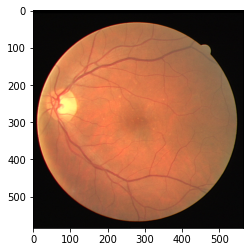

[[[0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  ...
  [0.03529412 0.03137255 0.02745098 ... 0.02745098 0.02745098 0.03137255]
  [0.02745098 0.02745098 0.02745098 ... 0.02745098 0.02745098 0.02352941]
  [0.02745098 0.02352941 0.03137255 ... 0.         0.00392157 0.00392157]]

 [[0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  ...
  [0.03529412 0.03137255 0.02745098 ... 0.02745098 0.02745098 0.02745098]
  [0.02745098 0.02745098 0.02745098 ... 0.02745098 0.02745098 0.02352941]
  [0.02745098 0.02352941 0.02352941 ... 0.         0.00392157 0.00392157]]

 [[0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.      

In [5]:
file = os.listdir(train_image_dir)[0]
images_name = [os.path.splitext(file)[0] for file in os.listdir(train_image_dir) if not file.startswith('.')]
img_name = images_name[0]
img_file = list(train_image_dir.glob(img_name + '.*'))
mask_file = list(train_mask_dir.glob(img_name + '_mask.*'))
ext = os.path.splitext(mask_file[0])
img = Image.open(img_file[0])
img = preprocess(img, 1, False)
plt.imshow(img.transpose(1,2,0))
plt.show()
print(img)

<class 'torch.Tensor'>
torch.Size([3, 584, 565])
torch.Size([584, 565])


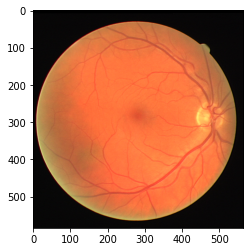

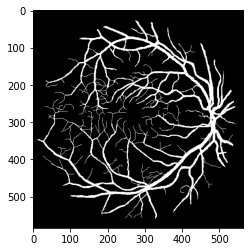

In [2]:
from utils.DriveDataset import DriveDataset

train_dataset = DriveDataset(train_image_dir, train_label_dir, 1, '_manual1')
test = train_dataset[3]
print(type(test['image']))
plt.imshow(test['image'].permute(1, 2, 0))
plt.show()

plt.imshow(test['mask'], cmap='gray')
plt.show()

print(test['image'].shape)
print(test['mask'].shape)

In [46]:
import torch.nn.functional as F
from torch.utils.data import DataLoader
from tqdm import tqdm

loader_args = dict(batch_size=2, num_workers=4, pin_memory=True)
train_loader = DataLoader(train_dataset, shuffle=True, **loader_args)
device = 'cpu'
for batch in tqdm(train_loader, total=len(train_loader), desc='Validation round', unit='batch', leave=False):
    image, mask_true = batch['image'], batch['mask']
    # move images and labels to correct device and type
    image = image.to(device=device, dtype=torch.float32)
    mask_true = mask_true.to(device=device, dtype=torch.long)
    mask_true = F.one_hot(mask_true, 2).permute(0, 3, 1, 2).float()

RuntimeError: Class values must be smaller than num_classes.

In [61]:
torch.arange(0,5) % 3
F.one_hot(torch.arange(0, 5) % 3)
a = torch.as_tensor([0, 1, 1, 1])
print(a.reshape([2,2]))
print(F.one_hot(a.reshape([2, 2]),2).permute(2,0,1))

tensor([[0, 1],
        [1, 1]])
tensor([[[1, 0],
         [0, 0]],

        [[0, 1],
         [1, 1]]])


In [70]:
name = '36_training'
id = name.split('_')[0]
print(id)

36
